# Analyse V1
Dec.28 2018

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
file = '\\\\192.168.1.2\\pi\\my_python\\2018-12.csv'

data = pd.read_csv(file, names=['Rank', 'Year', 'Month', 'Day','Hour', 'Minute', 'Keyword', 'Heat', 'Read', 'Discussion'], encoding='utf-8')
print(data.shape)

(2450, 10)


In [161]:
def transfer_date_time(row):
    dt = pd.Timestamp(str(row['Year'])+'-'+str(row['Month'])+'-'+str(row['Day'])+'-'+str(row['Hour'])+':'+str(row['Minute']))
    return dt
data['date_time'] = data.apply(lambda row:transfer_date_time(row), axis = 1)

data['Keyword'] = data.apply(lambda row:row['Keyword'].strip(), axis=1)
data = data[['Rank','date_time','Keyword', 'Heat', 'Read', 'Discussion']]
data.head()

,Rank,date_time,Keyword,Heat,Read,Discussion
0,1,2018-12-29 04:50:00,刘德华现场中止演唱会,91051,210000000,44000
1,2,2018-12-29 04:50:00,皇后的品格 全程高能,52837,42541000,4486
2,3,2018-12-29 04:50:00,办完婚礼就捐份子钱,40265,23450000,1283
3,4,2018-12-29 04:50:00,周子瑜太撩了,40138,130000000,14000
4,5,2018-12-29 04:50:00,原生之罪 真香,39886,24769000,2936


In [192]:
df = data.loc[data['Rank'] <= 5]
df = data.loc[(data['Keyword'] == "刘德华现场中止演唱会") | (data['Keyword'] =="刘恺威抱小糯米出行")]
cols = df['Keyword'].unique()
rows = df['date_time'].unique()
ts_df = pd.DataFrame(index = rows, columns=cols)
for _, row in df.iterrows():
    ts_df.at[row['date_time'], row['Keyword']] = row['Heat']

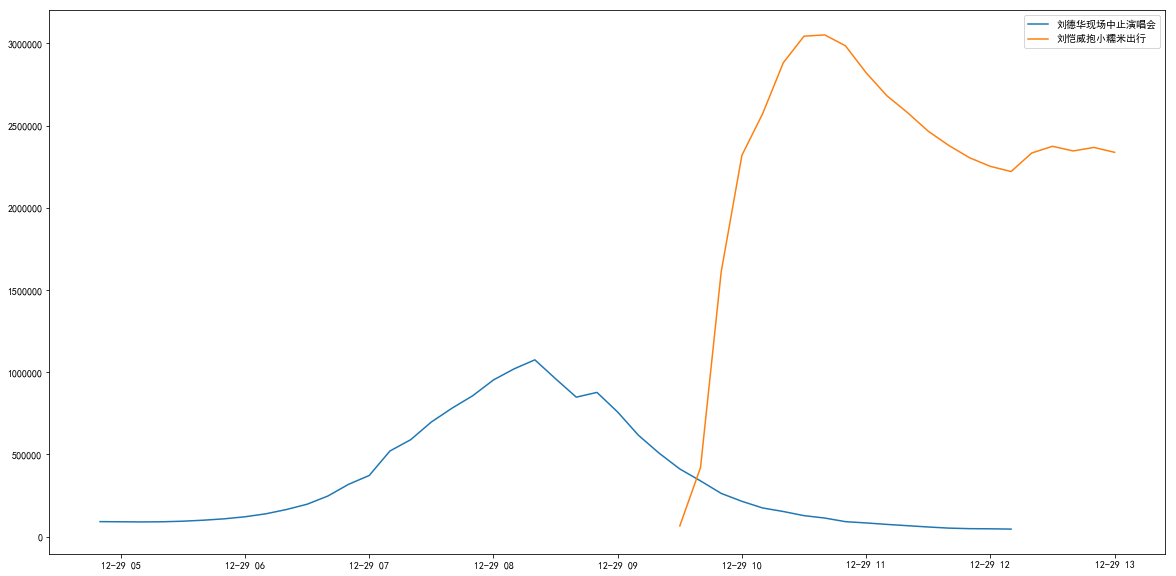

In [193]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


plt.figure(figsize=(20,10))
plt.plot(ts_df)
plt.legend(ts_df.columns)

plt.show()

In [173]:
data.loc[data['Rank'] == 1]

,Rank,date_time,Keyword,Heat,Read,Discussion
0,1,2018-12-29 04:50:00,刘德华现场中止演唱会,91051,210000000,44000
50,1,2018-12-29 05:10:00,刘德华现场中止演唱会,89195,220000000,45000
100,1,2018-12-29 05:20:00,刘德华现场中止演唱会,90186,220000000,45000
150,1,2018-12-29 05:30:00,刘德华现场中止演唱会,93616,220000000,45000
200,1,2018-12-29 05:40:00,刘德华现场中止演唱会,99815,220000000,45000
250,1,2018-12-29 05:50:00,刘德华现场中止演唱会,108164,220000000,45000
300,1,2018-12-29 06:00:00,刘德华现场中止演唱会,120611,229999999,45000
350,1,2018-12-29 06:10:00,刘德华现场中止演唱会,138450,229999999,46000
400,1,2018-12-29 06:20:00,刘德华现场中止演唱会,164566,229999999,46000
450,1,2018-12-29 06:30:00,刘德华现场中止演唱会,196868,229999999,46000


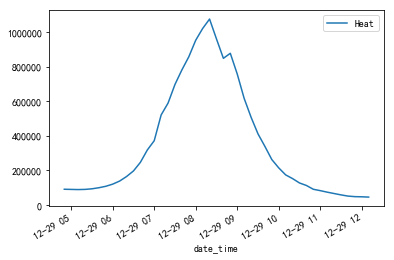

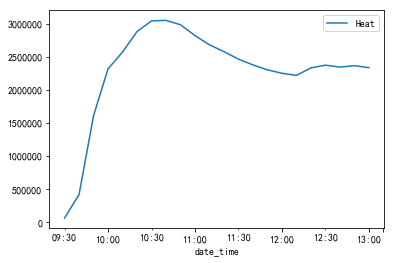

In [184]:
one_key = data.loc[data['Keyword'] == "刘德华现场中止演唱会"]
one_key.plot(x='date_time', y='Heat')

plt.show()

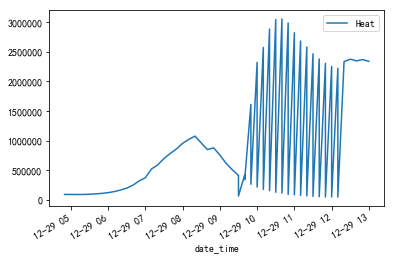

In [191]:
one_key = data.loc[(data['Keyword'] == "刘德华现场中止演唱会") | (data['Keyword'] =="刘恺威抱小糯米出行")]
one_key.plot(x='date_time', y='Heat')

plt.show()

In [172]:
data['Keyword'].unique()

array(['刘德华现场中止演唱会', '皇后的品格 全程高能', '办完婚礼就捐份子钱', '周子瑜太撩了', '原生之罪 真香',
       '讨厌的网络用语', '有些人别p的太过分', '刘德华哭着道歉', '手机触摸屏让孩子更聪明', '权健患癌女童主治医生',
       '宋运辉求婚', '十年后见到初恋', '鞠婧祎 红衣', '藤田淑子去世', '你找不到男朋友的原因', '郭艾伦被隔扣',
       '吴谨言 四川话', '杨幂西装', '胖子也可以拥有尖下巴', '美国猴子实验 新型艾滋病疫苗', '恋爱4个月胖50斤',
       '来电狂响', '沈月胖了', '广东人对冬天的尊重', '知否', '东京站无差别杀人嫌疑人被捕', '郝蕾好敢说',
       '朱珠每年都上榜', '分手要不要删联系方式', '年末joy', '闯红灯抓拍不带美颜', '老iG五人全部退役',
       '将夜第二季换人了', '胖了只能穿卫衣', '2018全球最帅100面孔', '曼娘上线', '异地恋会甜吗',
       '霍尊 北京一夜', '金敏喜', '发语音会很烦吗', '吉林爆炸', 'got7翻跟头', '2018你得到甜甜的恋爱了吗',
       '不发朋友圈被辞退', '微博之夜投票', '李大辉追星成功', '权健投票现场翻车', '2018全球最美100面孔',
       'EXO NCT', '武汉593公交已致1死7伤', '小龙虾开门红', '2019 从新开始', '波司登又上榜',
       '吉林爆燃无人员伤亡', '心疼华仔', 'kbs歌谣大祝祭节目单', '任达华发声力挺刘德华', '一休配音演员去世',
       '亲爱的客栈', '权健涉嫌虚假宣传被立案调查', '埃及吉萨金字塔附近爆炸', '费曼给自己投票',
       '当你和朋友计划好一起出去玩', '李昇基 演艺大赏', '郭艾伦 库里式庆祝', '权健华东总部富丽堂皇',
       '2018外卖骑手报告', '众星力挺刘德华', '退休27年写200万字小说', '假笑男人', '油价五连跌',
       '怕父母嫌弃男友穷', '2018最后一个工作日', '美国新型艾滋病疫苗证实有效', 